<a href="https://colab.research.google.com/github/smitike/Stock-Price-Prediction-Using-LSTM/blob/main/(27.34%25)lstm_improved_model_diff_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [4]:
import yfinance as yf
import pandas as pd

# Define start and end date
START = "2010-01-01"
TODAY = "2023-01-01"

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,284.889374,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,284.965271,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,278.521851,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,270.771057,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,265.237305,349.899994,359.250000,348.250000,358.000000,6048178


# Define start day to fetch the dataset from the yahoo finance library

---



In [5]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,284.889374,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,284.965271,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,278.521851,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,270.771057,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,265.237305,349.899994,359.250000,348.250000,358.000000,6048178


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-6-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

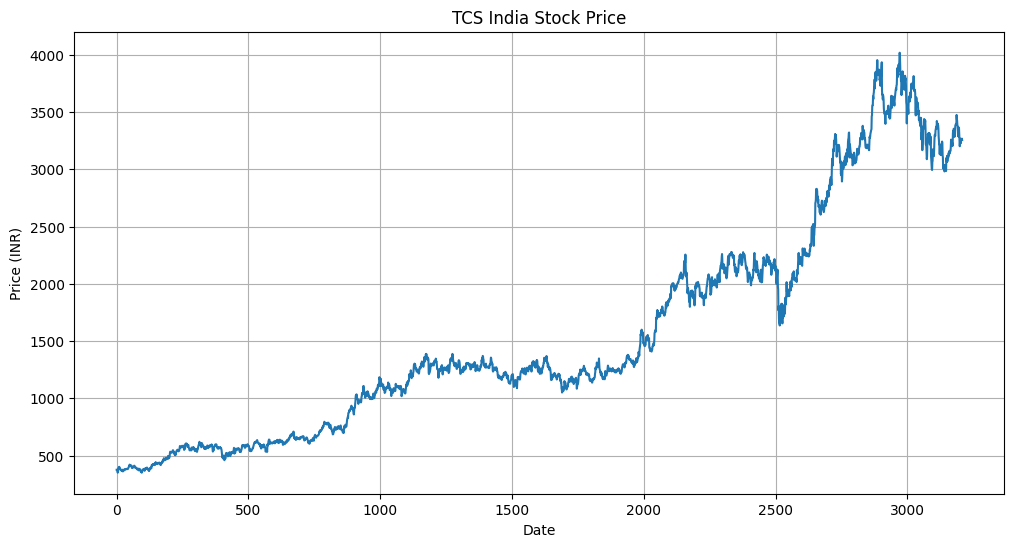

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3204,3252.899902,3272.000000,3225.050049,3228.350098,870157
3205,3259.500000,3273.800049,3231.500000,3269.199951,835883
3206,3257.100098,3266.100098,3226.000000,3249.800049,910795


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3204,3227.688494
3205,3227.295493
3206,3226.948494
3207,3226.240994


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

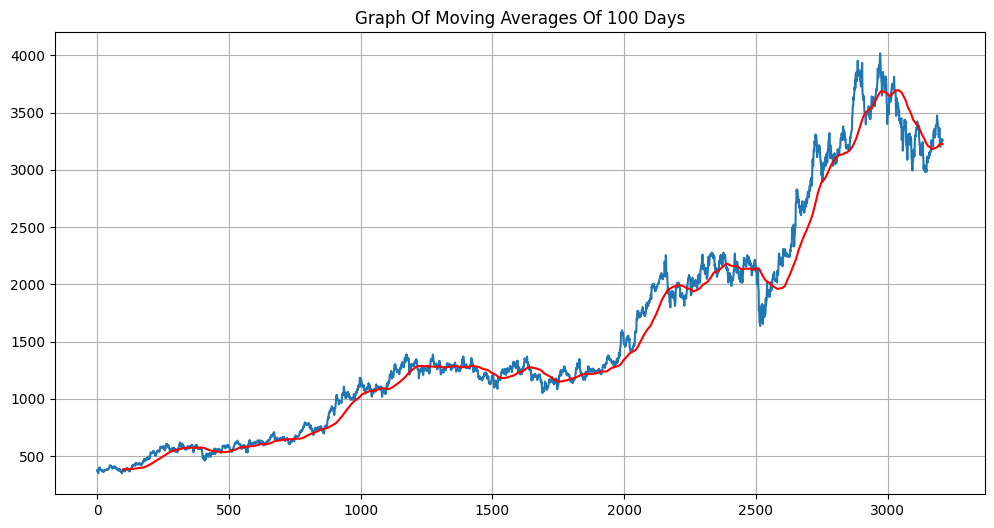

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3204,3320.515244
3205,3318.812994
3206,3316.935494
3207,3315.174495


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

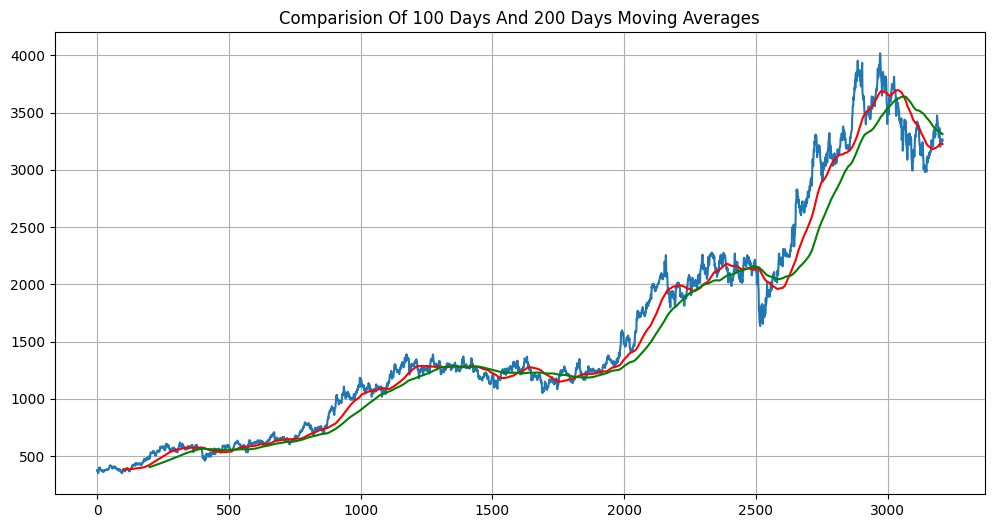

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(3209, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2246, 7)
(963, 7)


In [15]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,284.889374,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,284.965271,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,278.521851,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,270.771057,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,265.237305,349.899994,359.250000,348.250000,358.000000,6048178


In [16]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2246,2019-02-07 00:00:00+00:00,1841.933350,2082.899902,2097.949951,2067.000000,2074.750000,1339945
2247,2019-02-08 00:00:00+00:00,1822.920532,2061.399902,2089.500000,2051.000000,2075.000000,1684474
2248,2019-02-11 00:00:00+00:00,1826.899902,2065.899902,2096.000000,2048.899902,2060.000000,1778730
2249,2019-02-12 00:00:00+00:00,1814.254272,2051.600098,2070.000000,2018.000000,2070.000000,2422903
2250,2019-02-14 00:00:00+00:00,1808.063965,2044.599976,2075.000000,2033.050049,2060.050049,1724085


# Using MinMax scaler for normalization of the dataset

---



In [190]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

data_training_array = scaler.fit_transform(train_close)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
data_training_pca = pca.fit_transform(data_training_array)

# Preparing training data
x_train = []
y_train = []

for i in range(100, data_training_pca.shape[0]):
    x_train.append(data_training_pca[i-100:i])  # Use PCA-transformed data
    y_train.append(data_training_array[i, 0])  # Target remains untransformed

x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01726447],
       [0.01658796],
       [0.01292129],
       ...,
       [0.90942911],
       [0.91213515],
       [0.91919791]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [191]:
x_train.shape

(2146, 100, 1)

# ML Model (LSTM)

---



In [192]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [193]:
from tensorflow.keras.layers import Attention


In [194]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.1))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.1))

# model.add(LSTM(units=100, activation='relu', return_sequences=True))
# model.add(Dropout(0.1))


# Add Attention layer
# attention_output = Attention()([model.output, model.output])  # Self-attention on LSTM output
# model.add(Dense(units=1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [195]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_44 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [165]:
# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [196]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - loss: 0.0804 - mean_absolute_error: 0.2017
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0020 - mean_absolute_error: 0.0324
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0020 - mean_absolute_error: 0.0322
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0325
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0018 - mean_absolute_error: 0.0303
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0016 - mean_absolute_error: 0.0291
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015 - mean_absolute_error: 0.0280
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0014 - mean_absolute_error: 0.0273
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021 - mean_absolute_error: 0.0329
Epoch 11/100
68/68 ━━━━━━━

In [197]:
model.save('keras_model.h5')

In [198]:
test_close.shape

(963, 1)

In [199]:
past_100_days = pd.DataFrame(train_close[-100:])

In [200]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [201]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [202]:
final_df.head()

,0
0,2042.199951
1,2040.000000
2,2018.150024
3,2054.550049
4,2057.600098


In [203]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.21671817],
       [0.21582892],
       [0.2069969 ],
       ...,
       [0.69522423],
       [0.69603265],
       [0.70338929]])

In [204]:
input_data.shape

(1063, 1)

# Testing the model

---



In [205]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [206]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(963, 100, 1)
(963,)


SELAM - Ensure that both the training and testing data are normalized before feeding them into the model:

In [148]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train.reshape(-1, 1)).reshape(x_train.shape)
# x_test = scaler.transform(x_test.reshape(-1, 1)).reshape(x_test.shape)


# Making prediction and plotting the graph of predicted vs actual values

---



In [207]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [126]:
# # Select the last prediction from each sequence
# y_pred_last = y_pred[:, -1, 0]  # Select the last element from the second dimension

# # Inverse transform the selected predictions
# y_pred_inverse = scaler.inverse_transform(y_pred_last.reshape(-1, 1))  # Reshape to 2D for inverse_transform

# # Scale the predictions back to original units
# scale_factor = 1 / scaler.scale_[0]  # Get the scale factor from scaler.scale_
# y_pred_scaled = y_pred_inverse * scale_factor
# y_test_scaled = y_test * scale_factor  # Scale y_test as well

# ... (Rest of the code for plotting and evaluation)

In [208]:
y_pred.shape

(963, 1)

In [181]:
y_test

array([0.22674264, 0.22027525, 0.21942637, 0.20693626, 0.21301967,
       0.20408655, 0.18456314, 0.15600556, 0.15168051, 0.15804685,
       0.16130073, 0.17156772, 0.18844357, 0.20855311, 0.19060609,
       0.19171767, 0.19020188, 0.1936175 , 0.19974127, 0.2037228 ,
       0.20113583, 0.20087308, 0.1910103 , 0.19198042, 0.19602254,
       0.20410678, 0.1976798 , 0.19966045, 0.19291013, 0.1904444 ,
       0.18270378, 0.18389618, 0.1886659 , 0.20299519, 0.21461629,
       0.2231452 , 0.20265162, 0.20725965, 0.21287816, 0.22296322,
       0.21421207, 0.20517795, 0.20248993, 0.21623313, 0.24636715,
       0.24582142, 0.25851374, 0.25384507, 0.26275796, 0.26758828,
       0.27773393, 0.29266964, 0.28498962, 0.25018693, 0.24351744,
       0.25576508, 0.25236964, 0.25467372, 0.25053055, 0.24883278,
       0.22890522, 0.23381635, 0.23080499, 0.23603952, 0.21987104,
       0.2411124 , 0.22997634, 0.21987104, 0.21269628, 0.21586933,
       0.21784998, 0.23082522, 0.24590225, 0.26120171, 0.27470

In [182]:
y_pred

array([[0.19431266],
       [0.20135766],
       [0.20774908],
       [0.2127479 ],
       [0.21589859],
       [0.2172637 ],
       [0.21693774],
       [0.21464044],
       [0.20998058],
       [0.20308687],
       [0.1946833 ],
       [0.18614954],
       [0.1790775 ],
       [0.17505181],
       [0.1757017 ],
       [0.17966622],
       [0.18526876],
       [0.19109574],
       [0.1961341 ],
       [0.20011505],
       [0.20330559],
       [0.20575112],
       [0.20746794],
       [0.20793094],
       [0.20707679],
       [0.20544323],
       [0.20411311],
       [0.20341575],
       [0.20345521],
       [0.203735  ],
       [0.20375577],
       [0.20294094],
       [0.20117253],
       [0.19904283],
       [0.19807845],
       [0.19944498],
       [0.2035968 ],
       [0.20878108],
       [0.21331173],
       [0.21662657],
       [0.21917787],
       [0.22083154],
       [0.22126378],
       [0.22038372],
       [0.21891849],
       [0.21890225],
       [0.22193867],
       [0.229

In [209]:
scaler.scale_

array([0.00040421])

In [210]:
scale_factor = 1 / 0.00041967  # Replace with your scale factor
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


In [85]:
# scale_factor = 1/0.00041967
# y_pred = y_pred_inverse * scale_factor
# y_test = y_test * scale_factor

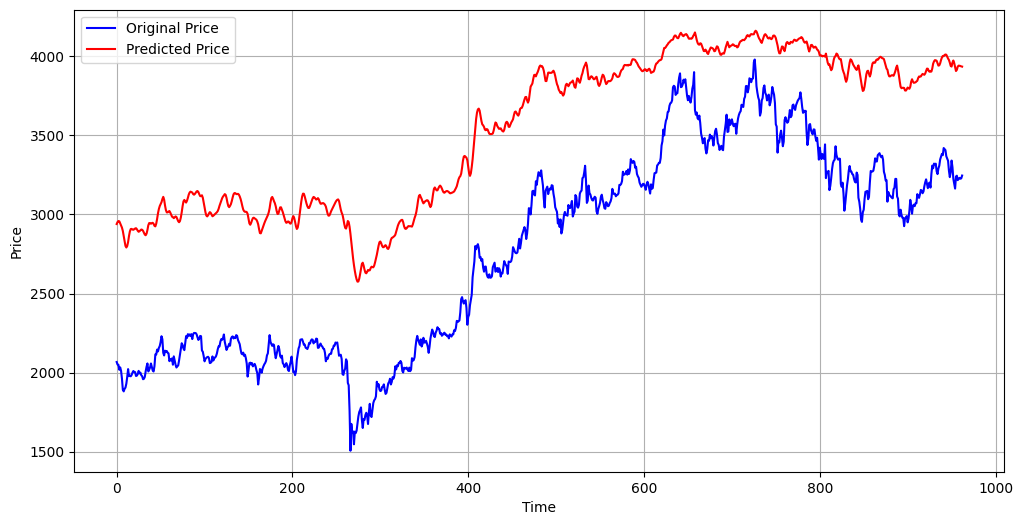

In [211]:
# y_pred = np.squeeze(y_pred)
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [212]:
from sklearn.metrics import mean_absolute_error

y_pred = y_pred.flatten()
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 27.34%


Calculation of R2 score

In [213]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: -0.4888685002286812


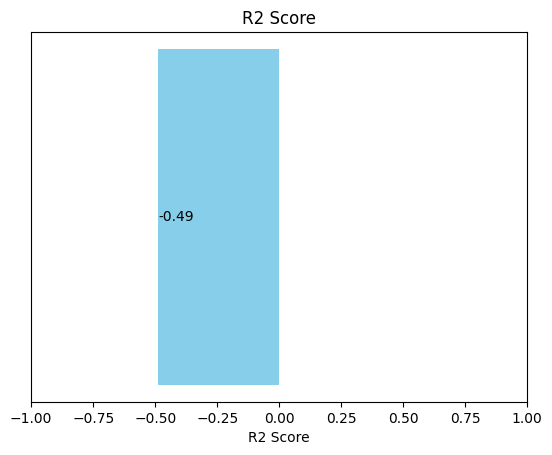

In [214]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

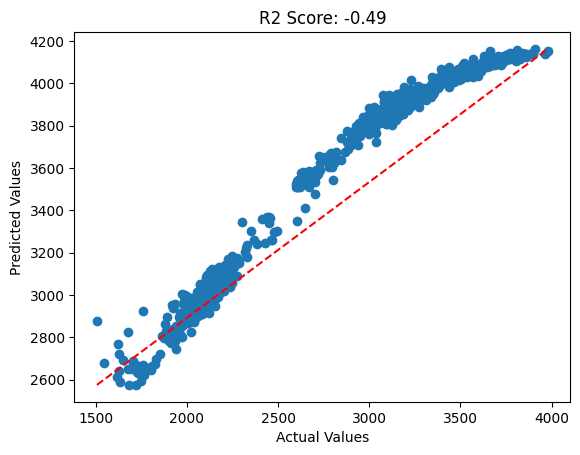

In [215]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()